# Customer Churn

## Problem
    
We will be predicting Customer Churn for a company in the Telecom Industry

>With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

## Inspiration 


Some possible insights could be -

* What variables are contributing to customer churn?
* Who are the customers more likely to churn?
* What actions can be taken to stop them from leaving?

>Kaggle Dataset >>> https://www.kaggle.com/barun2104/telecom-churn

## Features Explained


* Churn - 1 if customer cancelled service, 0 if not
* AccountWeeks - number of weeks customer has had active account
* ContractRenewal - 1 if customer recently renewed contract, 0 if not
* DataPlan - 1 if customer has data plan, 0 if not
* DataUsage - gigabytes of monthly data usage
* CustServCalls - number of calls into customer service
* DayMins - average daytime minutes per month
* DayCalls - average number of daytime calls
* MonthlyCharge - average monthly bill
* OverageFee - largest overage fee in last 12 months

In [1]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/telecom-churn/telecom_churn.csv


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [68]:
df = pd.read_csv("/kaggle/input/telecom-churn/telecom_churn.csv")
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


## Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


## Data Visualization

In [6]:
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


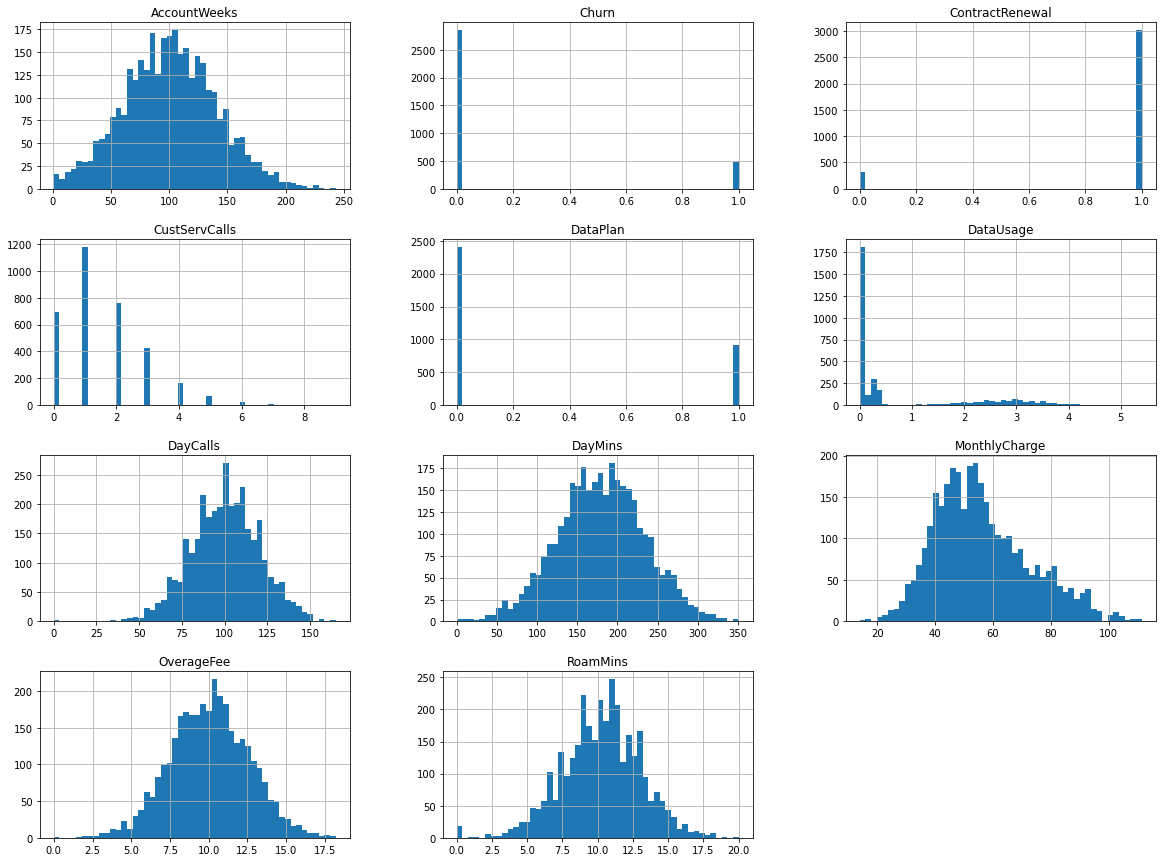

In [7]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show()

### We will add a few columns to the dataset to see if this helps improve accuracy

In [69]:
df["MonthlyChargeBucket"] = df["MonthlyCharge"] // 15 * 15
df[["MonthlyChargeBucket", "Churn"]].groupby(["MonthlyChargeBucket"]).mean()

,Churn
MonthlyChargeBucket,
0.0,1.000000
15.0,0.135135
30.0,0.139224
45.0,0.064565
60.0,0.338831
75.0,0.106101
90.0,0.119048
105.0,0.111111


In [70]:
df["DataUsageBucket"] = df["DataUsage"] // 1 * 1
df[["DataUsageBucket", "Churn"]].groupby(["DataUsageBucket"]).mean()

,Churn
DataUsageBucket,
0.0,0.166667
1.0,0.070866
2.0,0.071599
3.0,0.108359
4.0,0.111111
5.0,1.000000


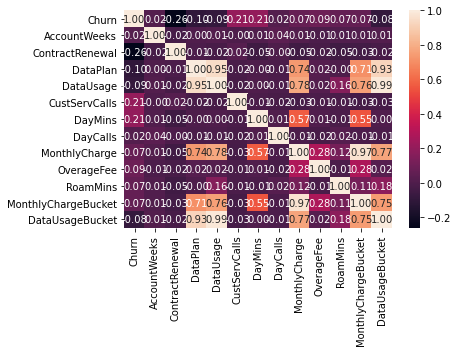

In [11]:
sns.heatmap(df.corr(), annot=True, fmt='.2f');

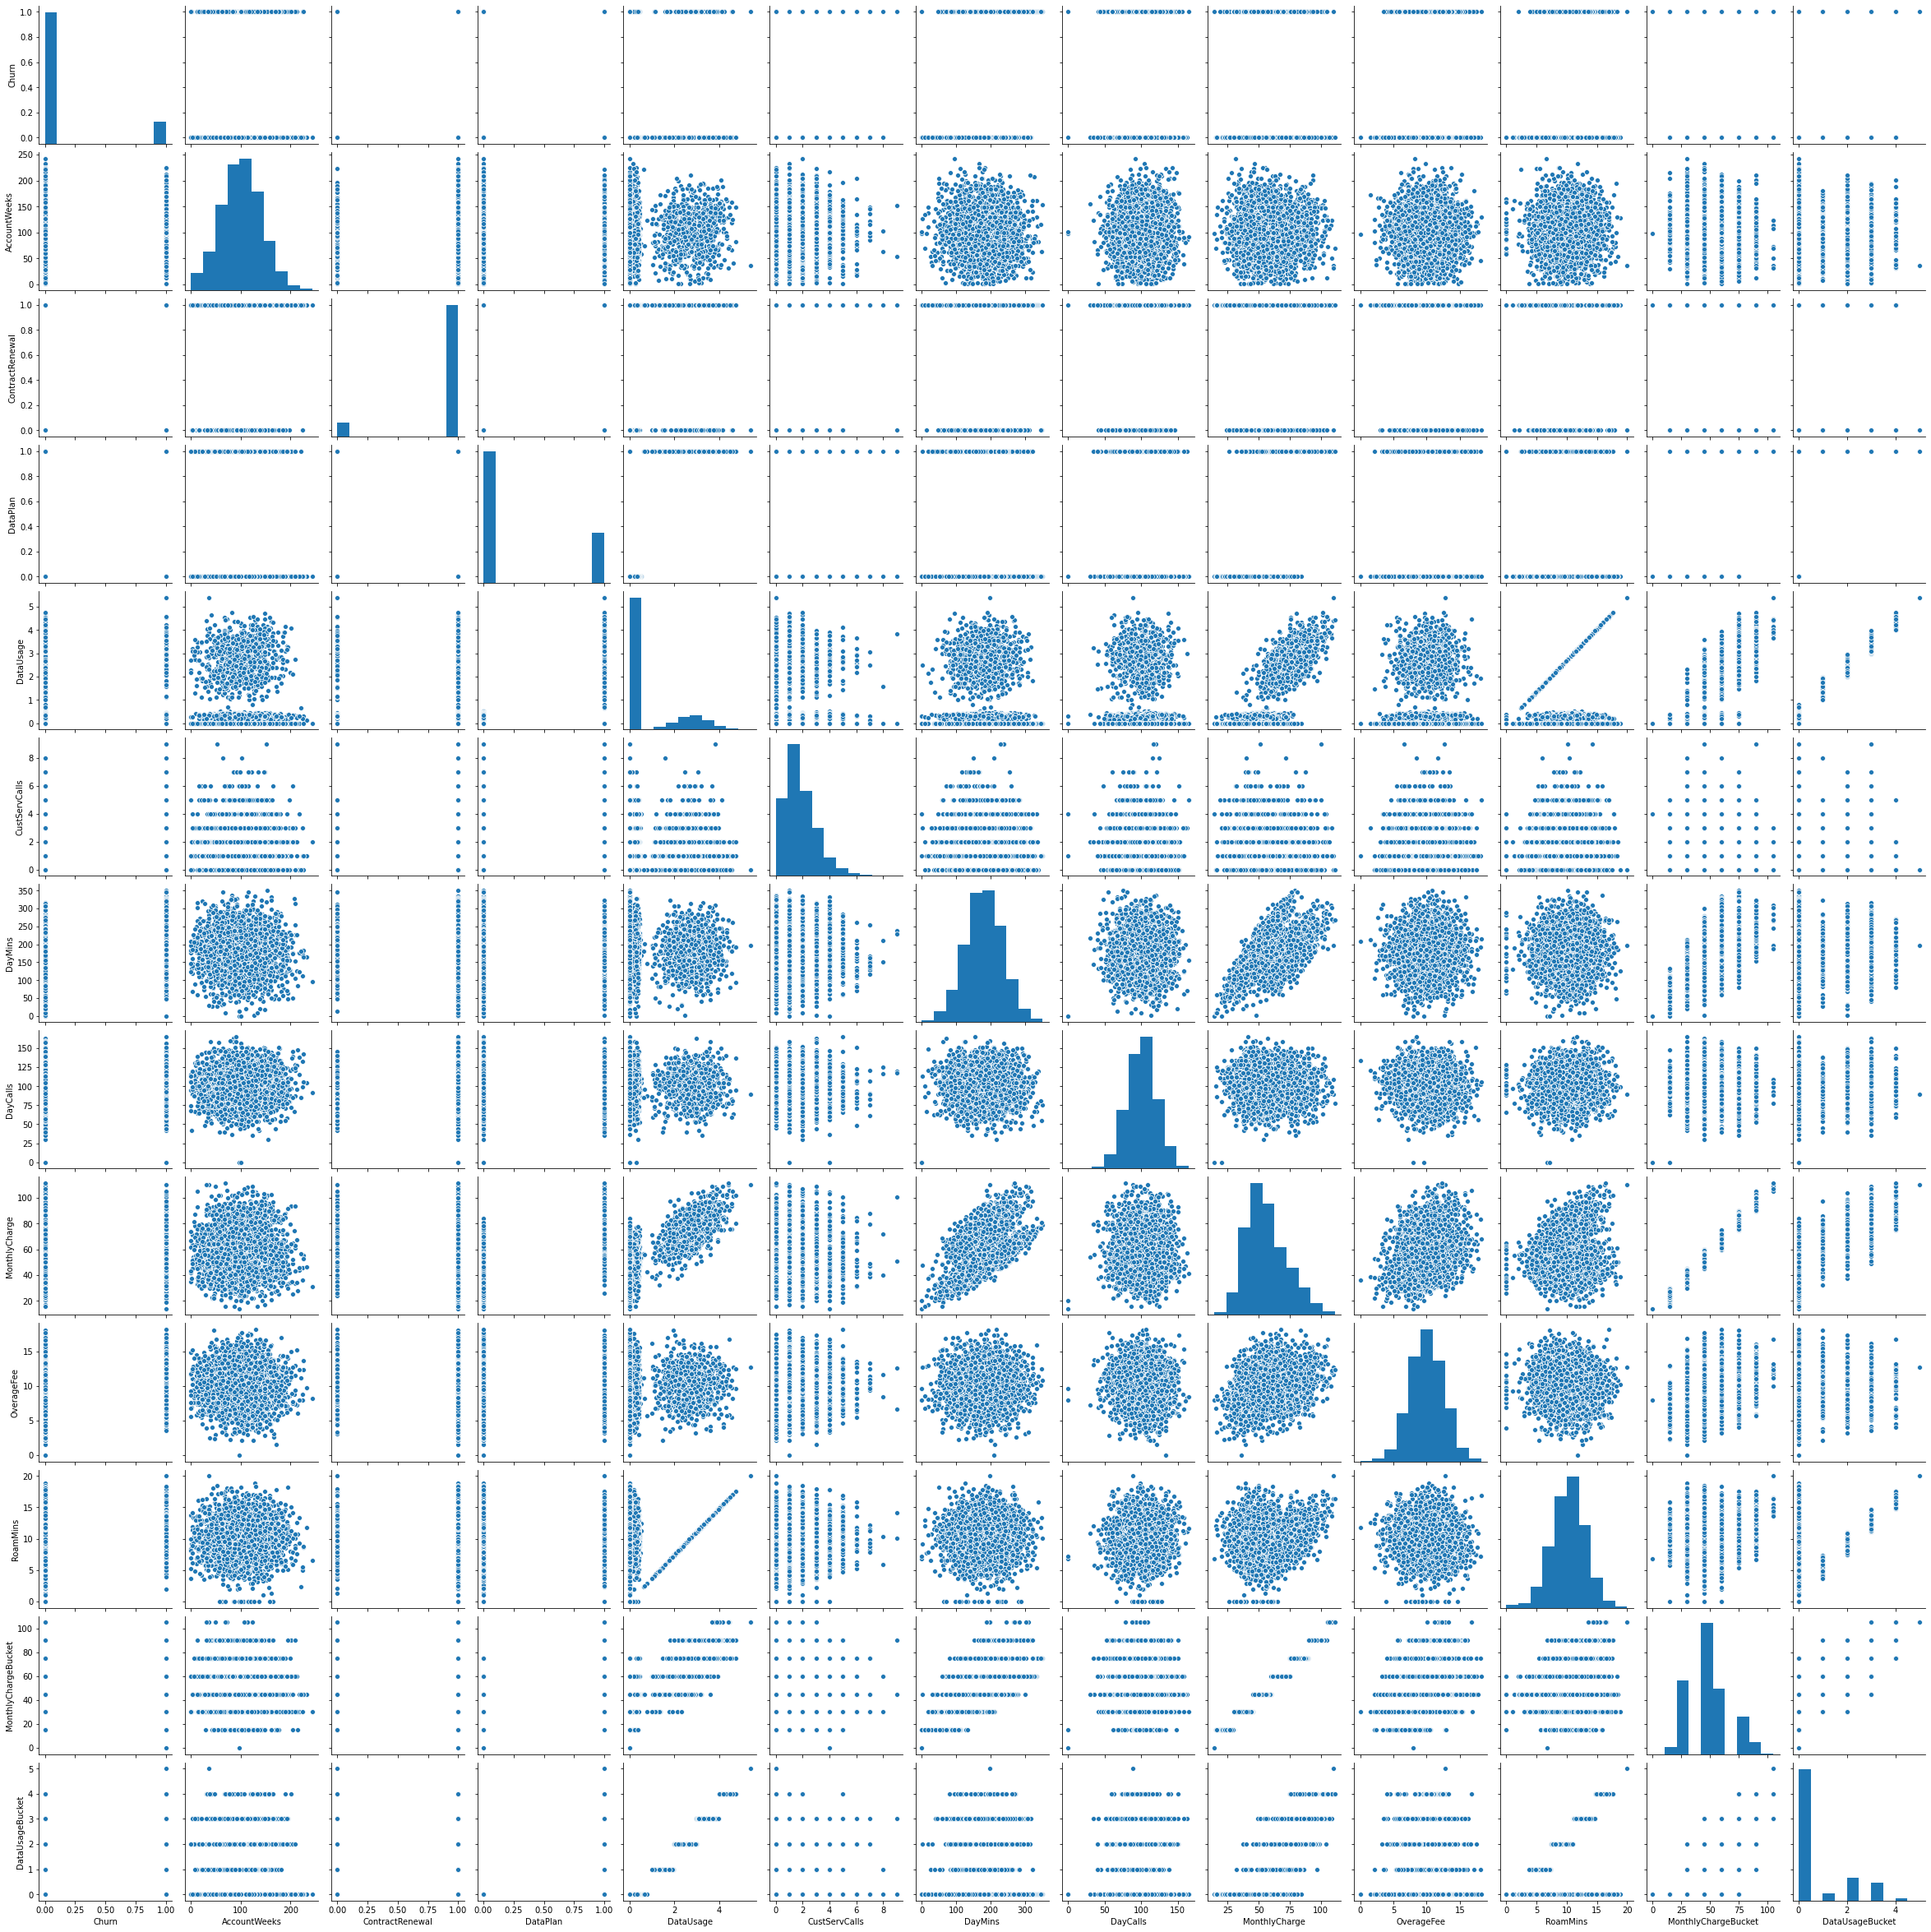

In [12]:
sns.pairplot(df);

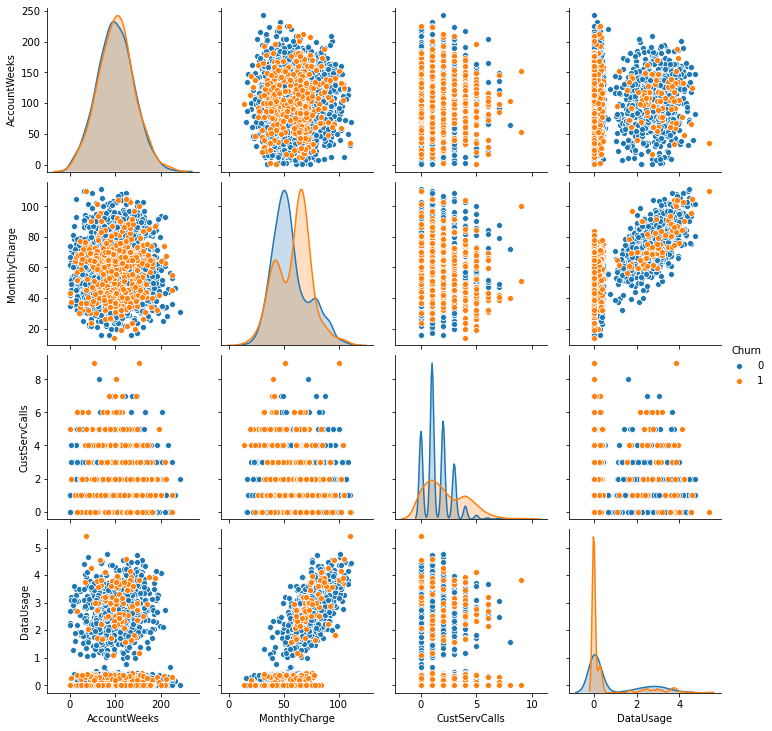

In [13]:
sns.pairplot(df[['AccountWeeks', 'MonthlyCharge', 'CustServCalls', 'DataUsage', 'Churn']], hue='Churn');

## Split and Train Data

Let's split the data into train/test, thn run a model first without tuning much of the data to see what score we get first, then we will  improve the model to get a better accuracy score

In [14]:
np.random.seed(42)

from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape



((2666, 12), (667, 12), (2666,), (667,))

## Modeling and Predicitions

In [19]:
#We Will create a function for plotting the accuracy of the models and a function for obtaining the important
#features in predicting each model

from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5) # Increase font size

# Helper function for plotting accuracy
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                    fmt='d')
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

## First Model - RandomForestClassifier

In [17]:
from sklearn.ensemble import RandomForestClassifier


rfc_model = RandomForestClassifier()

rfc_model.fit(X_train, y_train)
rfc_model.score(X_test, y_test)


0.9280359820089955

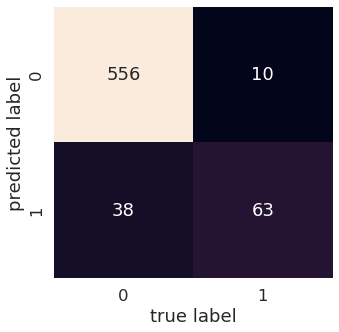

In [21]:


y_preds = rfc_model.predict(X_test)

plot_conf_mat(y_test, y_preds)


Not Too Bad at 92.8% Accuracy before any hyptertuning

### RandomizedSearchCV on RandomForestClassifier

In [22]:
from sklearn.model_selection import RandomizedSearchCV

params = {
        'n_estimators' : [120],
        'criterion': ['gini'],
        'max_depth': [None, 0,1,2],
        "min_samples_split": [2,4, 6, 8],
        "min_samples_leaf": [0, 2,6,9]
}


rsc_model = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=params,
                               cv=5,
                               n_iter=20,
                               verbose=True)


rsc_model.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   21.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [23]:
rsc_model.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'gini'}

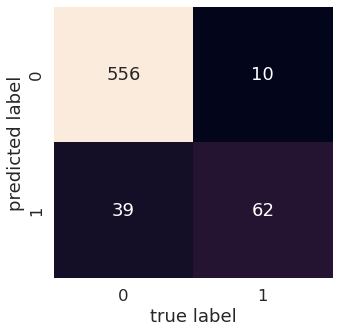

In [25]:
rsc_model = RandomForestClassifier(n_estimators=120,
 min_samples_split=4,
 min_samples_leaf=2,
 max_depth=None,
 criterion='gini')

rsc_model.fit(X_train, y_train)
y_preds = rsc_model.predict(X_test)
plot_conf_mat(y_test, y_preds)

okay, still at about 92.6%

## Adding Stadard Scaler to DataFrame, then re-run best fit model

In [30]:
from sklearn.preprocessing import StandardScaler


# train the standardization
scaler = StandardScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)


In [31]:
normalized_df.head()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,MonthlyChargeBucket,DataUsageBucket
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,1.523692,1.228858
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,1.523692,2.129624
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,-0.249206,-0.572674
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,-0.249206,-0.572674
4,-0.654629,-3.052685,-0.618396,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,-1.135655,-0.572674


In [32]:
X_normalized = normalized_df
y = df['Churn']


X_train_normalized, X_test_normalized, y_train_normalized, y_test_normalized = train_test_split(X_normalized, y, test_size = 0.20, random_state=42)


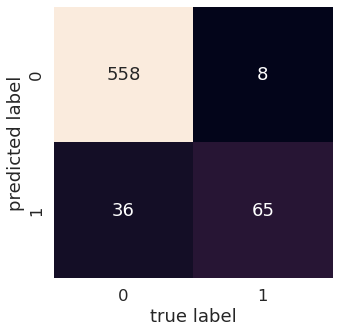

In [33]:
rsc_model.fit(X_train_normalized, y_train_normalized)

y_preds = rsc_model.predict(X_test_normalized)
plot_conf_mat(y_test_normalized, y_preds)

By scaling the data the model has slightly improved to 93.4%

## We will shuffle dataset to see if this can improve model

In [40]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


train_set_shuffled, test_set_shuffled = split_train_test(df, 0.2)

In [41]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32


def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

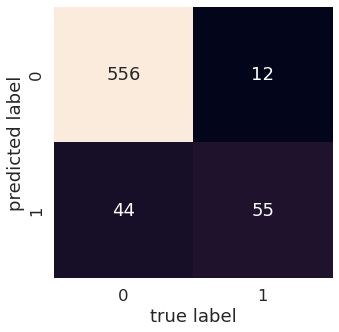

In [45]:
df_with_id = df.reset_index()  # adds an 'index' column
train_set_shuffled, test_set_shuffled = split_train_test_by_id(df_with_id, 0.2, "index")

X_train_shuffled = train_set_shuffled.drop('Churn', axis=1)
y_train_shuffled = train_set_shuffled['Churn']
X_test_shuffled = test_set_shuffled.drop('Churn', axis=1)
y_test_shuffled = test_set_shuffled['Churn']


rsc_model = RandomForestClassifier(n_estimators=120,
 min_samples_split= 2,
 min_samples_leaf=2,
 max_depth=8)

rsc_model.fit(X_train_shuffled, y_train_shuffled)
y_preds = rsc_model.predict(X_test_shuffled)
plot_conf_mat(y_test_shuffled, y_preds)

The model actually did not improve by shuffling the data, it got worse. It dropped to 91% accuracy

## Now we will standardized the shuffled data and see if that improves score

In [46]:
np.random.seed(42)


scaler = StandardScaler()

shuff_and_stand_train_set = pd.DataFrame(scaler.fit_transform(X_train_shuffled), index=X_train_shuffled.index, columns=X_train_shuffled.columns)
shuff_and_stand_test_set = pd.DataFrame(scaler.fit_transform(X_test_shuffled), index=X_test_shuffled.index, columns=X_test_shuffled.columns)




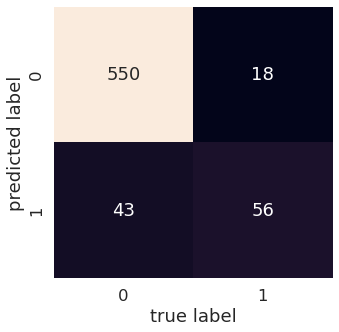

In [47]:
rsc_model.fit(shuff_and_stand_train_set, y_train_shuffled)

y_preds = rsc_model.predict(shuff_and_stand_test_set)

plot_conf_mat(y_test_shuffled, y_preds)


Model accuracy dropped to 90.8% so shuffling the dataset makes this classification model worse

## We will try MinMaxScaler instead of StandardScaler to see if it gives a higher score

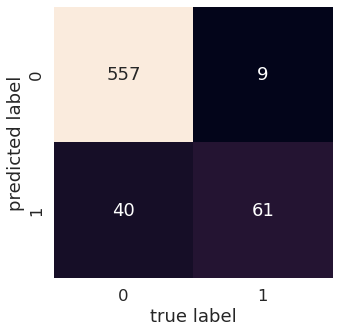

In [48]:

from sklearn.preprocessing import MinMaxScaler

# train the standardization
scaler = MinMaxScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), index=X.index, columns=X.columns)

X_scaler = X_scaled
y = df['Churn']


X_train_scaler, X_test_scaler, y_train_scaler, y_test_scaler = train_test_split(X_scaler, y, test_size = 0.20, random_state=42)


rsc_model.fit(X_train_scaler, y_train_scaler)
y_preds = rsc_model.predict( X_test_scaler)

plot_conf_mat(y_test_scaler, y_preds)

This model is at 92.6%. So using the StandardScaler instead of MinMaxScaler actually improved accuracy more. StandardScaler on 
the dataset improved the accuracy to 93.4%

## Undersampling/Oversampling

In [51]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

We will now see if undersampling/oversampling the target variable will improve the model. Since we have an imbalanced target variable
we will see if sampling will improve the accuracy score

In [71]:
from imblearn.under_sampling import ClusterCentroids

X = df.drop('Churn', axis=1)
y = df['Churn']


cc = ClusterCentroids(random_state=42)

X_set, y_set = cc.fit_resample(X, y)

In [72]:
y_set.value_counts()

1    483
0    483
Name: Churn, dtype: int64

In [73]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((772, 12), (772,), (194, 12), (194,))

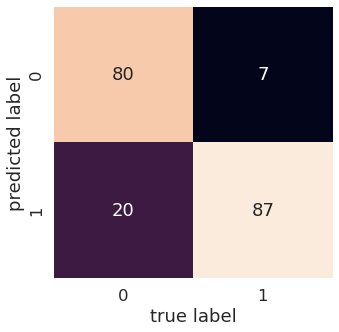

In [78]:
np.random.seed(42)

rfc_model.fit(X_train, y_train)
y_preds = rfc_model.predict(X_test)

plot_conf_mat(y_test, y_preds)

So the accuracy reduced when we performed undersampling. The model is at 86% accurate so we will try RandomizedSearchCV
to see if that improves model

In [80]:
params = {
        'n_estimators' : [20, 40, 60, 100, 120, 160],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 0,1,2, -1, 5],
        "min_samples_split": [0, 2,4, 6, 8,13],
        "min_samples_leaf": [0, 2,6,9, 12]
}


rsc_model = RandomizedSearchCV(RandomForestClassifier(),
                               param_distributions=params,
                               cv=5,
                               n_iter=20,
                               verbose=True)


rsc_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [81]:
rsc_model.best_params_

{'n_estimators': 120,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': None,
 'criterion': 'gini'}

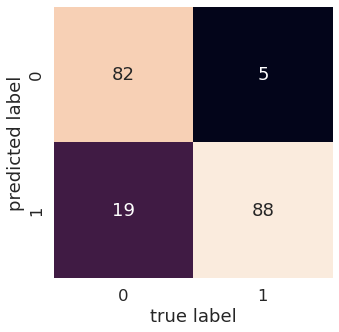

In [83]:
rsc_model = RandomForestClassifier(n_estimators=120,
 min_samples_split=8,
 min_samples_leaf=2,
 max_depth=None,
 criterion='gini')

rsc_model.fit(X_train, y_train)
y_preds = rsc_model.predict(X_test)

plot_conf_mat(y_test, y_preds)

Didn't improve the model much. It's at 87.6%, so so far StandardScaler still has produced the best model. Lastly,
we will try oversampling and see what accuracy it produces

In [86]:
from imblearn.over_sampling import SMOTE
seed=100

X = df.drop('Churn', axis=1)
y = df['Churn']

sm = SMOTE(sampling_strategy='auto', k_neighbors=2, random_state=seed)

X_res, y_res = sm.fit_resample(X, y)

y_res.value_counts()

1    2850
0    2850
Name: Churn, dtype: int64

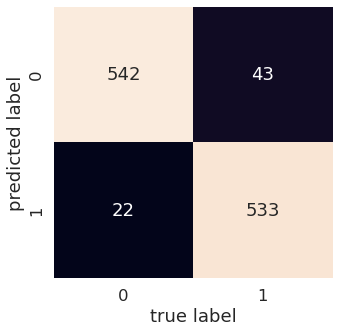

In [87]:
X_train, X_test,y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

rfc_model.fit(X_train, y_train)

y_preds = rfc_model.predict(X_test)

plot_conf_mat(y_test, y_preds)

This model is at 94.2%. Which is the highest accuracy model by percentage. So by using oversampling which added more 
rows of data with a target of 1, it improved the model the most. I would love to get
more data to see the effectiveness of this model over time

## What variables contribute the most to customer churn?

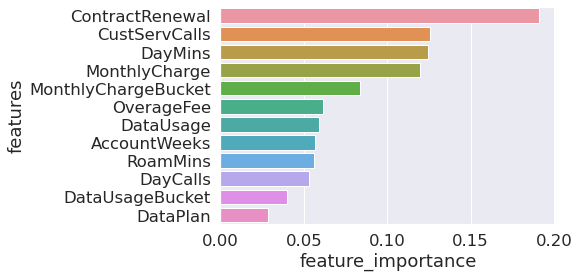

In [89]:
plot_features(X_train.columns, rfc_model.feature_importances_)

So the top 4 factors contribute the most to identifying potential customer churn are:
    * If a customer renews a contract or not 
    * The amount of customer service calls the customer makes
    * The amount of Daytime Minutes they use
    * The customer's monthly bill charge 
    

So it seems the way to keep a customer longer is to reduce the number of service calls they have to make providing
proactive service, and inform customers on ways they can reduce their monthly bill charge.
If this is done, I believe if this is done customers will renew their contract, trust you, and turn into a long time customer.